In [15]:
import sys
sys.path.insert(0, '..')

In [16]:
import pandas as pd

from helper_functions_general import read_data, get_impl_date, get_data_path
from definitions import data_path, show_plots, data_source_path, figures_path_meth, \
    treatment_countries, fig_size, show_plots, save_figs, show_results
from plot_functions import plot_corr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
timeframe = 'm'
country = 'united kingdom'
target_var = 'co2'
diff_level, diff_order = 12, 2
date_start = '2004-01-01'

In [18]:
df_raw = read_data(get_data_path(timeframe), f'total_{timeframe}')
df = df_raw.copy()
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/m/total_m.csv'

date
2004-01-01    5.394055e+10
2004-02-01    5.379037e+10
2004-03-01    5.703766e+10
2004-04-01    4.822989e+10
2004-05-01    4.411408e+10
                  ...     
2019-06-01    2.864851e+10
2019-07-01    2.872032e+10
2019-08-01    2.809851e+10
2019-09-01    3.070698e+10
2019-10-01    3.352261e+10
Name: co2, Length: 190, dtype: float64

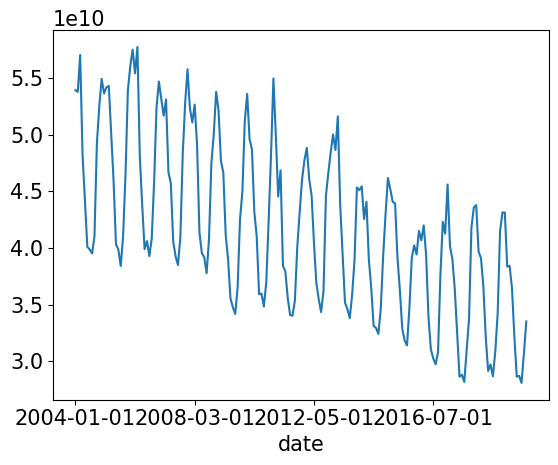

In [12]:
# 0. raw data
orig_data = df[(df['country']==country) & (df['date']>=date_start)].set_index('date')[target_var]
orig_data.plot()
orig_data

date
2004-01-01    24.711148
2004-02-01    24.708360
2004-03-01    24.766978
2004-04-01    24.599245
2004-05-01    24.510045
                ...    
2019-06-01    24.078367
2019-07-01    24.080871
2019-08-01    24.058982
2019-09-01    24.147756
2019-10-01    24.235486
Name: co2, Length: 190, dtype: float64

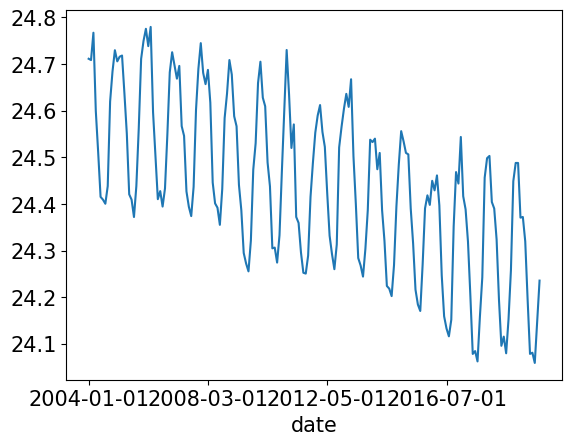

In [13]:
# 1. log
orig_data_log = np.log(orig_data)
orig_data_log.plot()
orig_data_log

[[            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [            nan]
 [ 7.53346392e-02]
 [ 1.54151237e-02]
 [ 1.10335546e-01]
 [-7.74688791e-02]
 [-8.78344027e-02]
 [-1.58970773e-02]
 [ 1.84630264e-02]
 [ 5.08801173e-02]
 [-5.51480186e-03]
 [ 4.59088714e-02]
 [-5.58595375e-02]
 [-4.41528033e-02]
 [-1.48804319e-01]
 [-9.24480574e-02]
 [-1.45010678e-01]
 [ 1.02905104e-02]
 [ 8.99105132e-02]
 [ 2.71515951e-02]
 [-5.19616714e-02]
 [-4.28429835e-02]
 [ 8.83691299e-03]
 [ 6.42318850e-02]
 [ 3.64814473e-02]
 [ 4.37892576e-02]
 [ 6.37028239e-02]
 [ 5.80671821e-02]
 [ 7.51177970e-02]
 [ 8.02612175e-02]
 [-1.4262652

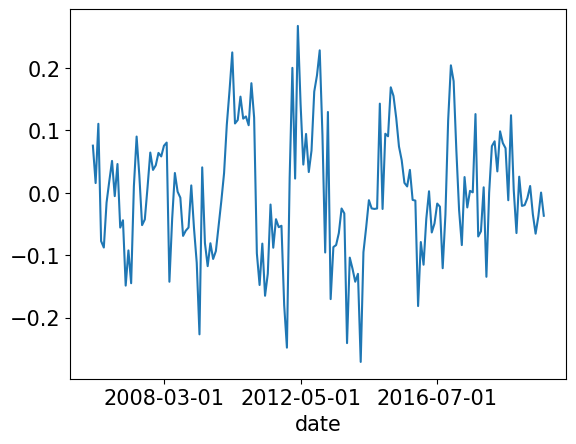

In [14]:
# 2. log diff 

# i = 1
# while i <= diff_order:
#     orig_data_log_diff = orig_data_log.diff(diff_level)
#     i += 1

orig_data_log_diff1 = orig_data_log.diff(diff_level)
orig_data_log_diff2 = orig_data_log_diff1.diff(diff_level)

orig_data_log_diff2.plot()
print(np.array(orig_data_log_diff2).reshape(-1, 1))

array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [ 0.76431109],
       [ 0.16519094],
       [ 1.11427634],
       [-0.76353281],
       [-0.86717507],
       [-0.14789187],
       [ 0.19566616],
       [ 0.51979648],
       [-0.04408211],
       [ 0.47009025],
       [-0.54746645],
       [-0.43041376],
       [-1.47679791],
       [-0.91330584],
       [-1.43886625],
       [ 0.11395123],
       [ 0.91005159],
       [ 0.28254097],
       [-0.50849266],
       [-0.4173172 ],
       [ 0.09941707],
       [ 0

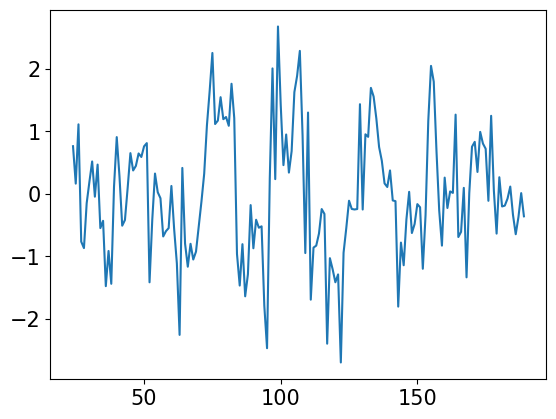

In [15]:
# 3. log diff stand

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

orig_data_log_diff_stand = SS.fit_transform(np.array(orig_data_log_diff2).reshape(-1, 1))
plt.plot(orig_data_log_diff_stand)
orig_data_log_diff_stand

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        7.53346392e-02,  1.54151237e-02,  1.10335546e-01, -7.74688791e-02,
       -8.78344027e-02, -1.58970773e-02,  1.84630264e-02,  5.08801173e-02,
       -5.51480186e-03,  4.59088714e-02, -5.58595375e-02, -4.41528033e-02,
       -1.48804319e-01, -9.24480574e-02, -1.45010678e-01,  1.02905104e-02,
        8.99105132e-02,  2.71515951e-02, -5.19616714e-02, -4.28429835e-02,
        8.83691299e-03,  6.42318850e-02,  3.64814473e-02,  4.37892576e-02,
        6.37028239e-02,  5.80671821e-02,  7.51177970e-02,  8.02612175e-02,
       -1.42626525e-01, -

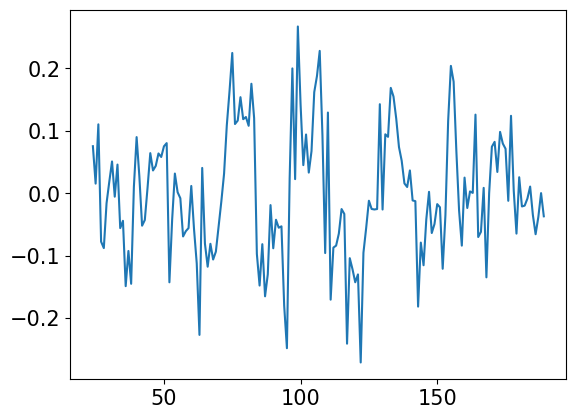

In [16]:
def flatten(lst):
    return [item for sublist in lst for item in sublist]

# 2. log diff stand_inv
orig_data_log_diff_stand_standinv = np.array(flatten(SS.inverse_transform(orig_data_log_diff_stand)))
plt.plot(orig_data_log_diff_stand_standinv)
orig_data_log_diff_stand_standinv

In [18]:
# 1. log
pred1 = np.zeros(len(orig_data_log_diff1))
pred1[diff_level:2*diff_level] = orig_data_log_diff1[diff_level:2*diff_level]
pred1
for i in range(2*diff_level, len(orig_data_log_diff1)):
    pred1[i] = pred1[i-diff_level] + orig_data_log_diff_stand_standinv[i]

pred1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.57238598e-03,  7.22914353e-03, -4.89511147e-02,  3.73492495e-02,
        4.04960292e-02,  5.45141384e-03, -6.98775962e-05, -2.84540085e-02,
        1.90880991e-04, -5.81243384e-02,  2.69950207e-02,  1.99100946e-02,
        6.97622533e-02,  2.26442672e-02,  6.13844312e-02, -4.01196296e-02,
       -4.73383735e-02, -1.04456635e-02,  1.83931488e-02,  2.24261088e-02,
       -5.32392087e-03, -1.22154670e-02, -2.88645169e-02, -2.42427086e-02,
       -7.90420654e-02, -6.98037902e-02, -8.36262463e-02, -2.98291192e-02,
        4.25721397e-02,  1.67059316e-02, -3.35685226e-02, -2.04168747e-02,
        3.51299212e-03,  5.20164180e-02,  7.61693045e-03,  1.95465489e-02,
       -1.53392415e-02, -1.17366081e-02, -8.50844929e-03,  5.04320983e-02,
       -1.00054386e-01, -

array([24.71114828, 24.70836033, 24.76697767, 24.59924469, 24.51004489,
       24.41501636, 24.40908294, 24.4002807 , 24.43820308, 24.61949749,
       24.68380267, 24.72943143, 24.7055759 , 24.71558947, 24.71802656,
       24.63659394, 24.55054092, 24.42046777, 24.40901306, 24.37182669,
       24.43839396, 24.56137315, 24.7107977 , 24.74934152, 24.77533815,
       24.73823374, 24.77941099, 24.59647431, 24.50320255, 24.41002211,
       24.42740621, 24.3942528 , 24.43307004, 24.54915768, 24.68193318,
       24.72509881, 24.69629608, 24.66842995, 24.69578474, 24.56664519,
       24.54577469, 24.42672804, 24.39383769, 24.37383592, 24.43658304,
       24.6011741 , 24.68955011, 24.74464536, 24.68095684, 24.65669334,
       24.68727629, 24.61707729, 24.4457203 , 24.40103768, 24.39180081,
       24.35504618, 24.43207405, 24.58399258, 24.63640868, 24.70840013,
       24.67726293, 24.58790479, 24.56643533, 24.44065181, 24.38621229,
       24.29466757, 24.27213019, 24.25528193, 24.32143814, 24.47

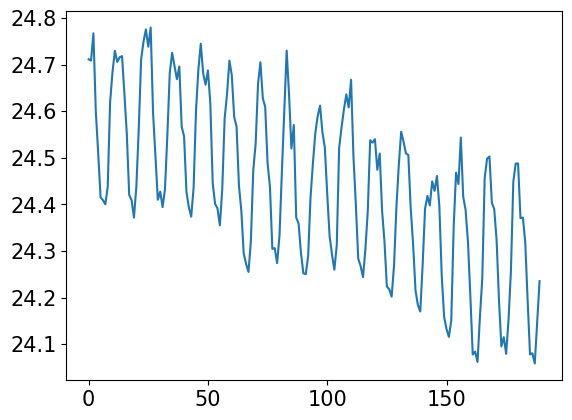

In [19]:
orig_data_log_diff_stand_standinv_diffinv2 = np.zeros(len(orig_data_log))
orig_data_log_diff_stand_standinv_diffinv2[:diff_level] = orig_data_log[:diff_level]
orig_data_log_diff_stand_standinv_diffinv2
for i in range(diff_level, len(orig_data_log)):
    orig_data_log_diff_stand_standinv_diffinv2[i] = orig_data_log_diff_stand_standinv_diffinv2[i-diff_level] + pred1[i]
    
plt.plot(orig_data_log_diff_stand_standinv_diffinv2)
orig_data_log_diff_stand_standinv_diffinv2

array([5.39405462e+10, 5.37903721e+10, 5.70376648e+10, 4.82298851e+10,
       4.41140823e+10, 4.01150077e+10, 3.98776934e+10, 3.95282204e+10,
       4.10560106e+10, 4.92166337e+10, 5.24854946e+10, 5.49358197e+10,
       5.36408046e+10, 5.41806394e+10, 5.43128432e+10, 5.00652973e+10,
       4.59371927e+10, 4.03342884e+10, 3.98749070e+10, 3.84193350e+10,
       4.10638482e+10, 4.64374995e+10, 5.39216388e+10, 5.60405583e+10,
       5.75165258e+10, 5.54215166e+10, 5.77512592e+10, 4.80964549e+10,
       4.38132688e+10, 3.99151628e+10, 4.06151186e+10, 3.92906650e+10,
       4.08458084e+10, 4.58736943e+10, 5.23874648e+10, 5.46983188e+10,
       5.31453305e+10, 5.16848196e+10, 5.31181621e+10, 4.66829663e+10,
       4.57187662e+10, 4.05875839e+10, 3.92743586e+10, 3.84966061e+10,
       4.09895518e+10, 4.83230302e+10, 5.27880201e+10, 5.57779999e+10,
       5.23363420e+10, 5.10817610e+10, 5.26681262e+10, 4.90976636e+10,
       4.13658006e+10, 3.95581539e+10, 3.91944428e+10, 3.77800181e+10,
      

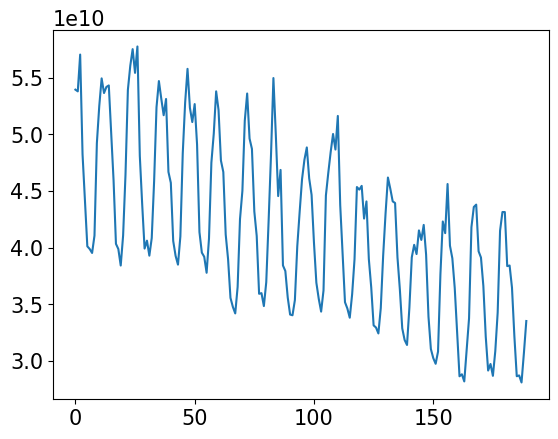

In [14]:
# 0. log diff_inv stand_inv

orig_data_log_diff_stand_standinv_diffinv_loginv = np.exp(orig_data_log_diff_stand_standinv_diffinv2)
plt.plot(orig_data_log_diff_stand_standinv_diffinv_loginv)
orig_data_log_diff_stand_standinv_diffinv_loginv

In [15]:
act_pred = pd.DataFrame(list(zip(orig_data_log, orig_data_log_diff_stand_standinv_diffinv2)), columns=['act', 'pred']).set_index(orig_data_log.index)
act_pred

,act,pred
date,,
2004-01-01,24.711148,24.711148
2004-02-01,24.708360,24.708360
2004-03-01,24.766978,24.766978
2004-04-01,24.599245,24.599245
2004-05-01,24.510045,24.510045
...,...,...
2019-06-01,24.078367,24.078367
2019-07-01,24.080871,24.080871
2019-08-01,24.058982,24.058982


<AxesSubplot:xlabel='date'>

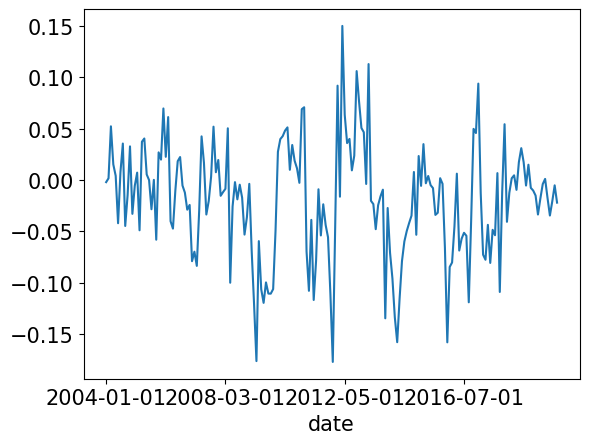

In [28]:
df_stat_country = df_stat[df_stat['country']==country]
df_stat_country.set_index('date')['co2'].plot()

<AxesSubplot:xlabel='date'>

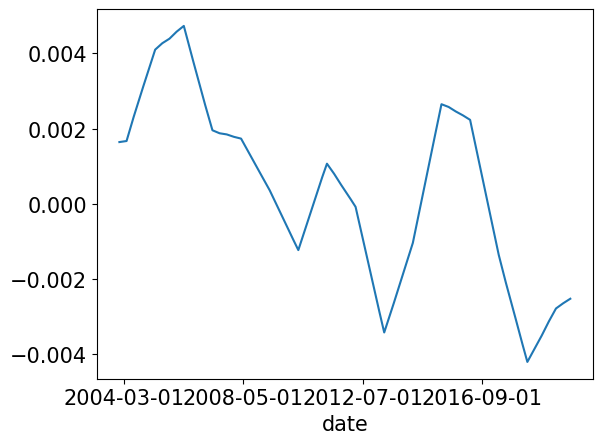

In [64]:
orig_data = df[df['country']==country]
np.log(orig_data.set_index('date')['pop']).diff(24).diff(24).plot()